In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold


DATA DESCRIPTION + DATA CLEANING

In [ ]:
df = pd.read_csv("/content/drive/My Drive/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
drop_index = 5572
df = df.drop(drop_index)
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(5157, 2)

In [ ]:
count_category = df['Category'].value_counts()
count_category

Category
ham     4516
spam     641
Name: count, dtype: int64

#DATA DISTRIBUTION

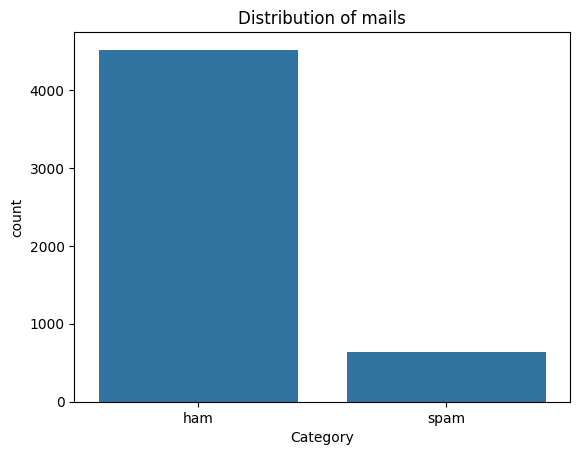

In [ ]:
sns.countplot(df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [ ]:
unique_categories = df['Category'].unique()
print(unique_categories)

['ham' 'spam']


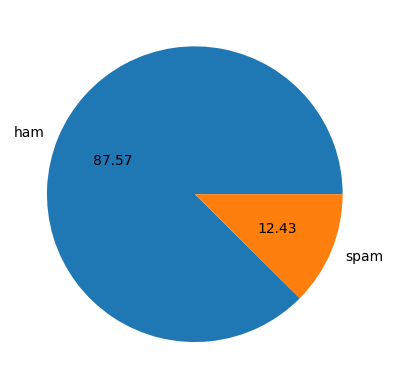

In [ ]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

TEXT PROCESSING

In [ ]:
df['spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [ ]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
import string

def preprocessing(text):
    text = text.lower()

    for txt in text:
        if txt in string.punctuation:
            text = text.replace(txt,"").strip()

    return text


In [ ]:
df['Message'] = df['Message'].apply(preprocessing)
print(df['Message'][10])

im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today


In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Split text into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Example usage
text = "This is a sample sentence, showing off the stop words filtration."
clean_text = remove_stopwords(text)
print(clean_text)

sample sentence, showing stop words filtration.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
remove_stopwords("im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today")

'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today'

In [ ]:
df['Message'] = df['Message'].apply(remove_stopwords)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def steaming(text):
    text = nltk.word_tokenize(text)
    lst = []
    for i in text:
        lst.append(ps.stem(i))
    return ' '.join(lst)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
steaming("im gonna home soon dont want talk stuff anymore tonight k ive cried enough today")

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [ ]:
df['Message'] = df['Message'].apply(steaming)

In [ ]:
df.drop(columns=['Category'],inplace=True)
df.rename(columns={'spam':'Category'},inplace=True)

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

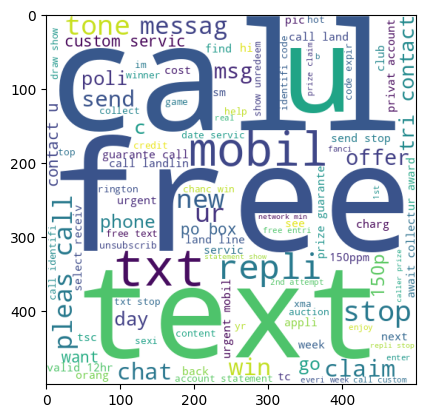

In [ ]:
spam_wc = wc.generate(df[df['Category']==1]['Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

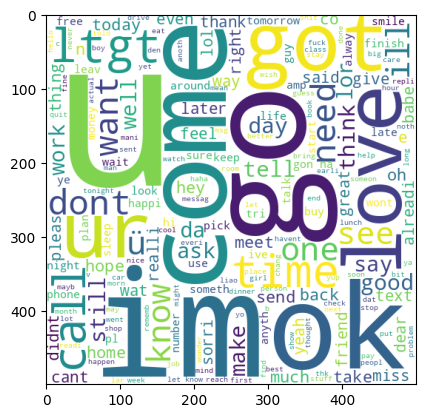

In [ ]:
ham_wc = wc.generate(df[df['Category']==0]['Message'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['Category'] == 1]['Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

10620

<ipython-input-249-0cf683f3b9bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='dark')


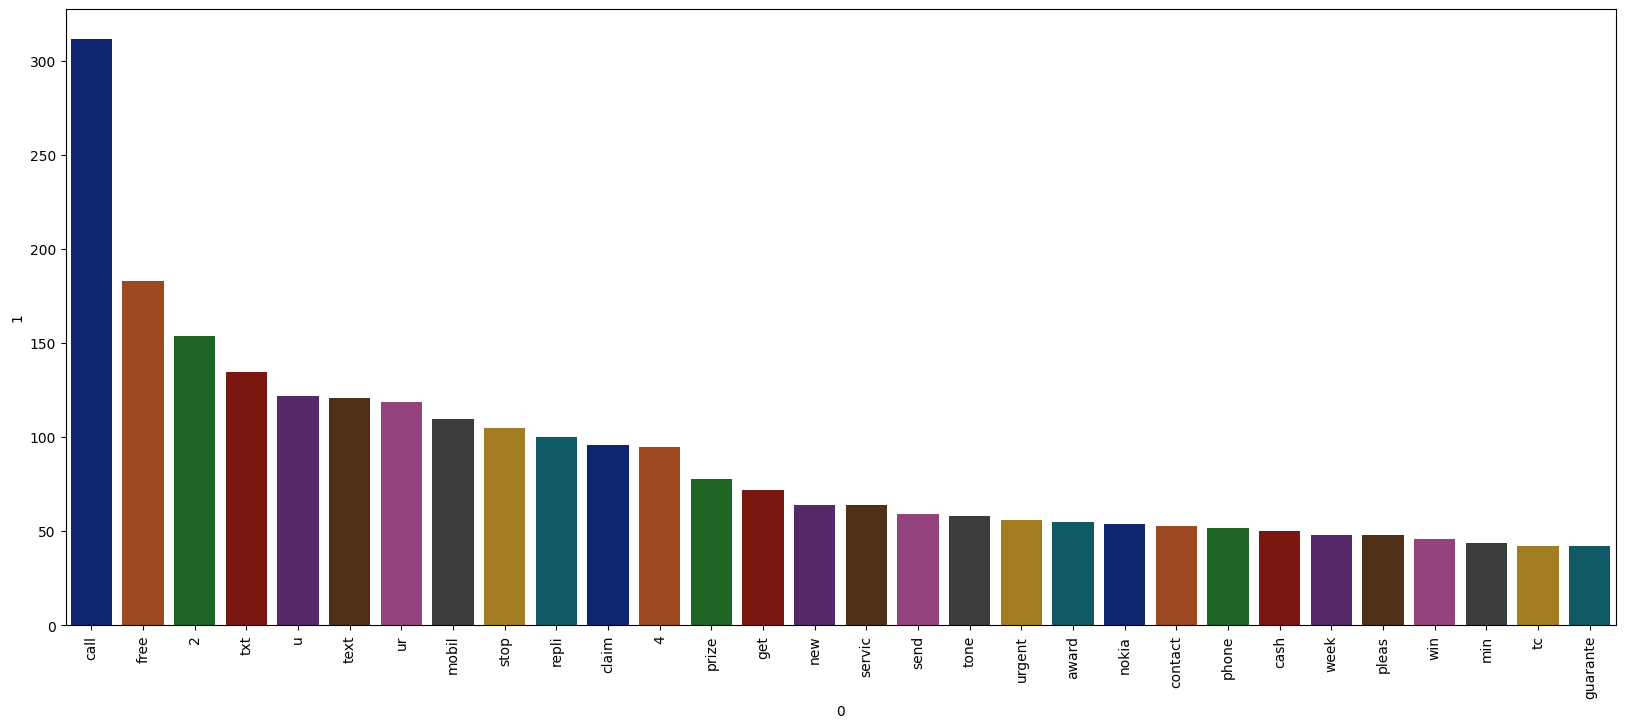

In [ ]:
from collections import Counter
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='dark')
plt.xticks(rotation=90)
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Category'] == 0]['Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

37447

<ipython-input-251-b3b4cce8570b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='dark')


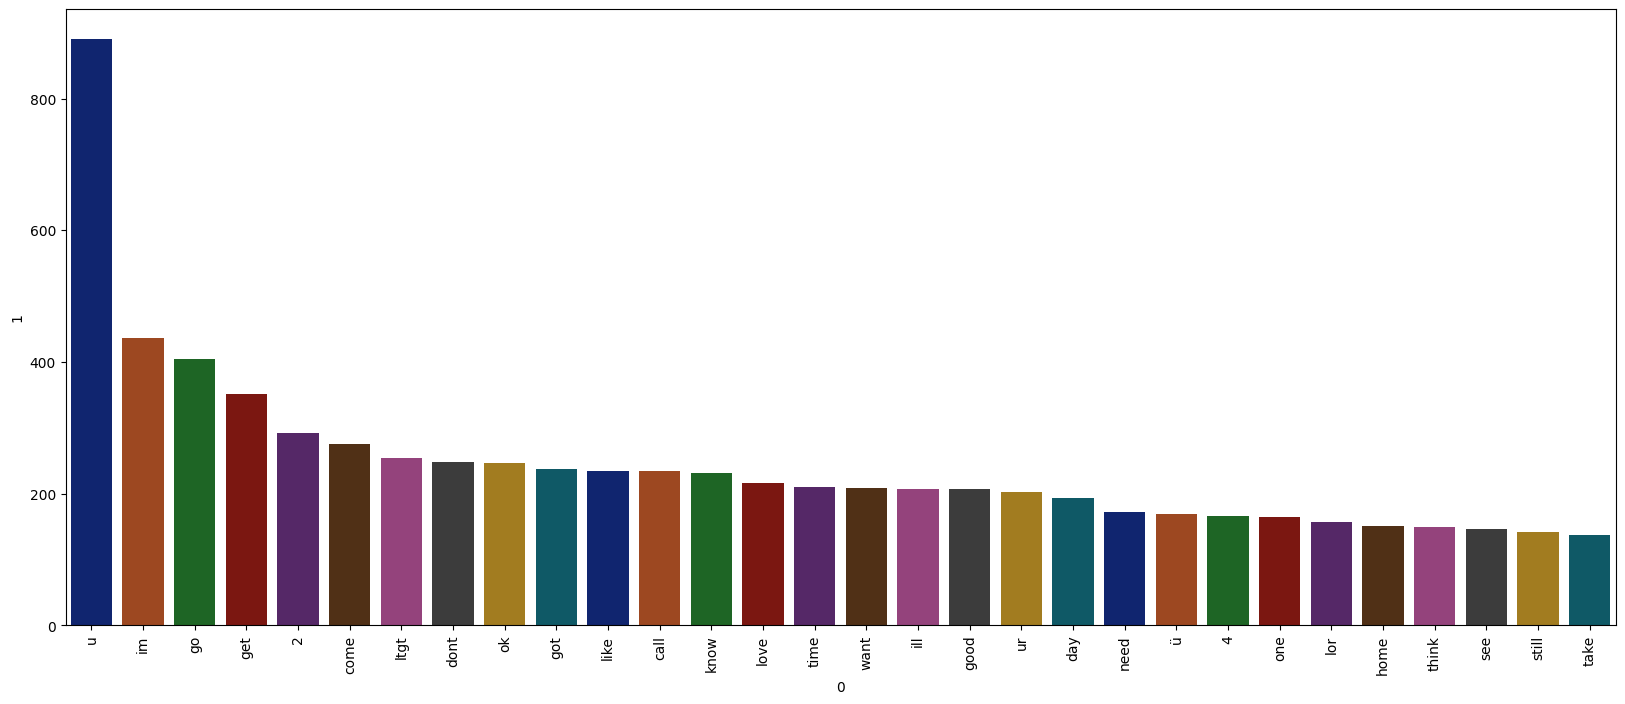

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='dark')
plt.xticks(rotation=90)
plt.show()

MODELING

LABEL

In [ ]:
df.loc[df['Category'] == 'ham', 'Category'] = 0
df.loc[df['Category'] == 'spam', 'Category'] = 1

In [ ]:
df.head()

,Message,Category
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah dont think goe usf live around though,0


In [ ]:
X = df["Message"]
Y = df["Category"]

In [ ]:
print(X)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u £750 pound prize 2 ...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object


In [ ]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int64


*SPLIT* DATA

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_features = feature_extraction.fit_transform(X)

In [ ]:
Y = Y.astype('int')


In [ ]:
print(X_features)

  (0, 7522)	0.19605131713699972
  (0, 1134)	0.3526200173978418
  (0, 3305)	0.16315666826128444
  (0, 1986)	0.2974165758990682
  (0, 1713)	0.33647404580407353
  (0, 4169)	0.2974165758990682
  (0, 7714)	0.24897866111776323
  (0, 3342)	0.19805278690688782
  (0, 1715)	0.2974165758990682
  (0, 1318)	0.2723848349288368
  (0, 2200)	0.2723848349288368
  (0, 5487)	0.24098778031484766
  (0, 4026)	0.3526200173978418
  (1, 5152)	0.5610958305166694
  (1, 7629)	0.4419060887100835
  (1, 3992)	0.48344912968429643
  (1, 4204)	0.41775224895877183
  (1, 5123)	0.28574547281654245
  (2, 71)	0.2392992465624755
  (2, 1202)	0.16703381337153242
  (2, 5769)	0.2392992465624755
  (2, 7224)	0.1246828376561905
  (2, 5723)	0.2392992465624755
  (2, 5810)	0.15972956430887603
  (2, 866)	0.2283420727017282
  :	:
  (5152, 7169)	0.2021720891653377
  (5152, 7023)	0.17318240123074063
  (5152, 5539)	0.26296511977271736
  (5152, 1993)	0.20883375302706672
  (5152, 5620)	0.2195987931601302
  (5153, 2769)	0.693004094975893
  (51

In [ ]:
print(X)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u £750 pound prize 2 ...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object


{'0': {'precision': 0.9854096520763187, 'recall': 0.9799107142857143, 'f1-score': 0.982652490207051, 'support': 896}, '1': {'precision': 0.8723404255319149, 'recall': 0.9044117647058824, 'f1-score': 0.888086642599278, 'support': 136}, 'accuracy': 0.9699612403100775, 'macro avg': {'precision': 0.9288750388041168, 'recall': 0.9421612394957983, 'f1-score': 0.9353695664031645, 'support': 1032}, 'weighted avg': {'precision': 0.9705090563301569, 'recall': 0.9699612403100775, 'f1-score': 0.970190324243236, 'support': 1032}}




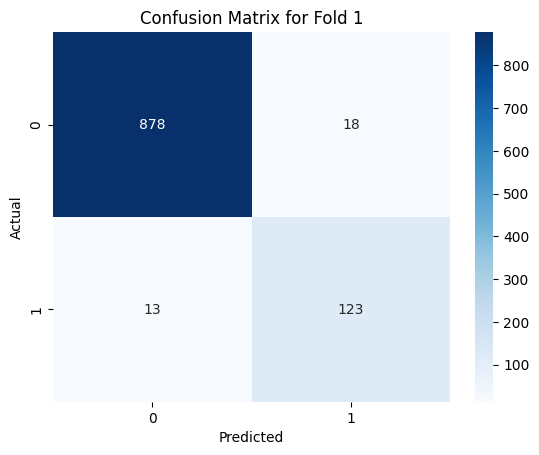

{'0': {'precision': 0.9770742358078602, 'recall': 0.991140642303433, 'f1-score': 0.9840571742715778, 'support': 903}, '1': {'precision': 0.9310344827586207, 'recall': 0.8372093023255814, 'f1-score': 0.8816326530612245, 'support': 129}, 'accuracy': 0.9718992248062015, 'macro avg': {'precision': 0.9540543592832404, 'recall': 0.9141749723145072, 'f1-score': 0.9328449136664012, 'support': 1032}, 'weighted avg': {'precision': 0.9713192666767053, 'recall': 0.9718992248062015, 'f1-score': 0.9712541091202836, 'support': 1032}}




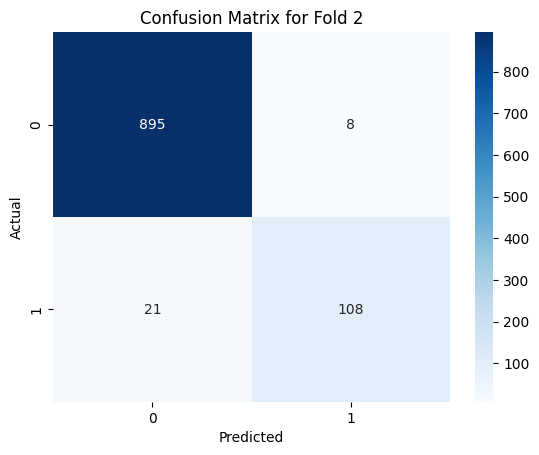

{'0': {'precision': 0.9713656387665198, 'recall': 0.9954853273137697, 'f1-score': 0.983277591973244, 'support': 886}, '1': {'precision': 0.967479674796748, 'recall': 0.8206896551724138, 'f1-score': 0.8880597014925374, 'support': 145}, 'accuracy': 0.9709020368574199, 'macro avg': {'precision': 0.969422656781634, 'recall': 0.9080874912430917, 'f1-score': 0.9356686467328907, 'support': 1031}, 'weighted avg': {'precision': 0.9708191161907517, 'recall': 0.9709020368574199, 'f1-score': 0.9698861330792553, 'support': 1031}}




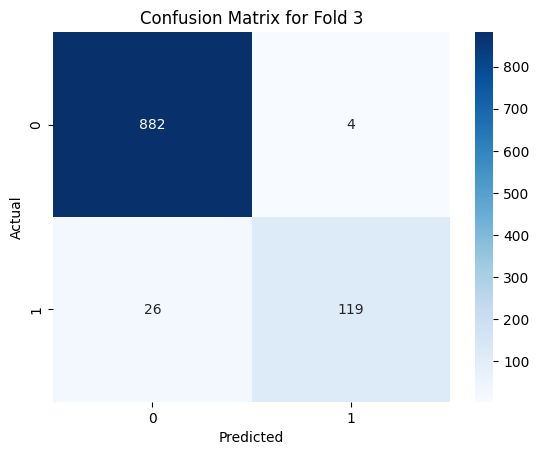

{'0': {'precision': 0.9859611231101512, 'recall': 0.9945533769063181, 'f1-score': 0.9902386117136659, 'support': 918}, '1': {'precision': 0.9523809523809523, 'recall': 0.8849557522123894, 'f1-score': 0.9174311926605505, 'support': 113}, 'accuracy': 0.9825412221144519, 'macro avg': {'precision': 0.9691710377455518, 'recall': 0.9397545645593537, 'f1-score': 0.9538349021871082, 'support': 1031}, 'weighted avg': {'precision': 0.9822806582290653, 'recall': 0.9825412221144519, 'f1-score': 0.9822587491016368, 'support': 1031}}




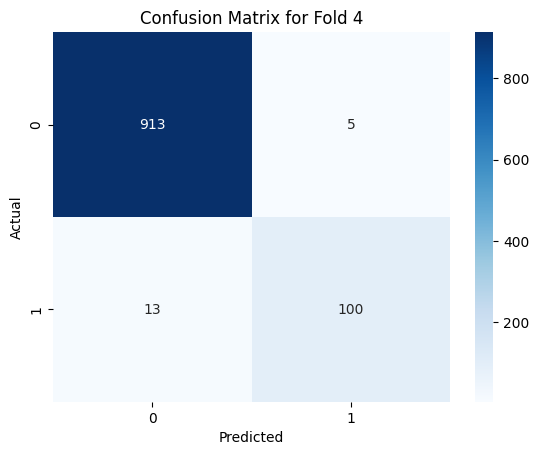

{'0': {'precision': 0.9732047159699893, 'recall': 0.9945235487404163, 'f1-score': 0.9837486457204767, 'support': 913}, '1': {'precision': 0.9489795918367347, 'recall': 0.788135593220339, 'f1-score': 0.861111111111111, 'support': 118}, 'accuracy': 0.9709020368574199, 'macro avg': {'precision': 0.961092153903362, 'recall': 0.8913295709803777, 'f1-score': 0.9224298784157938, 'support': 1031}, 'weighted avg': {'precision': 0.9704321023446507, 'recall': 0.9709020368574199, 'f1-score': 0.9697125360367665, 'support': 1031}}




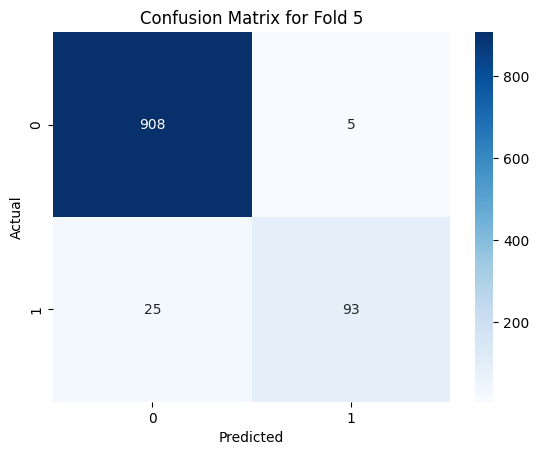

Mean Accuracy: 0.9732411521891141
Mean Precision: 0.973072039954266
Mean Recall: 0.9732411521891141
Mean F1-Score: 0.9726603703162355


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []

model = LogisticRegression()

for train_index, test_index in kf.split(X_features, Y):
    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Thực hiện oversampling trên tập huấn luyện bằng SMOTE
    smote = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    # Huấn luyện mô hình trên dữ liệu mới có oversampling
    model.fit(X_train_oversampled, y_train_oversampled)

    # Đánh giá mô hình trên fold hiện tại (tập kiểm tra)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    report = classification_report(y_test, y_pred, output_dict=True)

    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

    # In báo cáo phân loại và ma trận nhầm lẫn cho từng fold
    print(report)
    print('\n')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {len(accuracies)}')
    plt.show()

# Tính trung bình các giá trị accuracy, precision, recall và F1-score
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1_score)
